## Siddhardha - CS20B1063

### Feed Forward & Back-Propagation Learning Algorithm for Multiple  Perceptron

#####  Implement the feedforward and backpropagation learning algorithm for multiple perceptrons in Python for the question provided in the attached image. Initialize the weights and biases randomly. Implement the forward pass. Compute the loss between the predicted output and the actual output using an appropriate loss function. Compute the gradients of the loss function with respect to the weights and biases using the chain rule. Update the weights and biases. Iterate over multiple times (epochs), performing forward propagation, loss calculation, backpropagation, and parameter updates in each iteration till convergence.

In [226]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt

print("Imported")

Imported


In [227]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative Of Sigmoid Function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [228]:
class NeuralNetwork:
    # intializing the weights and biases
    def __init__(self, learning_rate=1):
        self.weights0 = np.random.rand(3, 2)
        self.weights1 = np.random.rand(3, 2)
        self.learning_rate = learning_rate

    def feedforward(self):
        self.hidden_layer_output = sigmoid(np.dot(self.input, self.weights0))
        # adding a bias term to the hidden layer
        self.hidden_layer_output = np.array([np.append(self.hidden_layer_output[0], 1)])
        self.output = sigmoid(np.dot(self.hidden_layer_output, self.weights1))

    def backprop(self):
        # Application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights1_2 = np.dot(
            self.hidden_layer_output.T,
            (2 * (self.output - self.y) * sigmoid_derivative(self.output)),
        )
        back_prop_weights_1_2 = np.array([self.weights1[0], self.weights1[1]])
        back_prop_hidden_layer_output = np.array(
            (self.hidden_layer_output[0][0], self.hidden_layer_output[0][1])
        )
        d_weights0_1 = np.dot(
            self.input.T,
            (
                np.dot(
                    2 * (self.output - self.y) * sigmoid_derivative(self.output),
                    back_prop_weights_1_2.T,
                )
                * sigmoid_derivative(back_prop_hidden_layer_output)
            ),
        )

        # Applying gradient descent to update the weights
        self.weights1 -= self.learning_rate * d_weights1_2
        self.weights0 -= self.learning_rate * d_weights0_1

    # function to train the model
    def train(self, x, y, epochs=1000, early_stopping=True):
        self.input = x
        self.y = y
        loss = []
        for i in range(epochs):
            self.feedforward()
            self.backprop()

            print(f"Loss at iteration {i} : {self.mean_square_error()}")
            loss.append(self.mean_square_error())

            # defining stopping criterion if MSE is less than 0.0001
            if self.mean_square_error() < 0.0001 and early_stopping:
                print(
                    f"Neural Network Converged at epoch {i} with loss {self.mean_square_error()}"
                )
                break
        return loss

    # loss function
    def mean_square_error(self):
        return np.mean(np.square(self.y - self.output))

    # function to print the weights of the model when called
    def return_weights(self):
        return f"weights0_1 : {self.weights0} \nweights1_2 : {self.weights1}"

In [229]:
nn = NeuralNetwork()

In [230]:
nn.train(np.array([[1, 0.91, 1.37]]), np.array([[1, 0]]))

Loss at iteration 0 : 0.3499410688570656
Loss at iteration 1 : 0.23003681939741769
Loss at iteration 2 : 0.13831671113169206
Loss at iteration 3 : 0.08283774420135093
Loss at iteration 4 : 0.05196172170192472
Loss at iteration 5 : 0.034511857083717526
Loss at iteration 6 : 0.024142208474734604
Loss at iteration 7 : 0.017634704862952735
Loss at iteration 8 : 0.013344867509404845
Loss at iteration 9 : 0.01039531241553961
Loss at iteration 10 : 0.008293918534629515
Loss at iteration 11 : 0.006751169448195074
Loss at iteration 12 : 0.0055892840703365716
Loss at iteration 13 : 0.0046948978386926795
Loss at iteration 14 : 0.003993295876233413
Loss at iteration 15 : 0.003433790728998285
Loss at iteration 16 : 0.0029811092303779155
Loss at iteration 17 : 0.0026101466071714223
Loss at iteration 18 : 0.0023026744739186793
Loss at iteration 19 : 0.0020452188944161047
Loss at iteration 20 : 0.001827659328306154
Loss at iteration 21 : 0.001642283269969902
Loss at iteration 22 : 0.001483135719707523

[0.3499410688570656,
 0.23003681939741769,
 0.13831671113169206,
 0.08283774420135093,
 0.05196172170192472,
 0.034511857083717526,
 0.024142208474734604,
 0.017634704862952735,
 0.013344867509404845,
 0.01039531241553961,
 0.008293918534629515,
 0.006751169448195074,
 0.0055892840703365716,
 0.0046948978386926795,
 0.003993295876233413,
 0.003433790728998285,
 0.0029811092303779155,
 0.0026101466071714223,
 0.0023026744739186793,
 0.0020452188944161047,
 0.001827659328306154,
 0.001642283269969902,
 0.0014831357197075238,
 0.001345563482588531,
 0.0012258907129673712,
 0.0011211844422626296,
 0.0010290828039998022,
 0.0009476675978131249,
 0.0008753686422994123,
 0.0008108912098456923,
 0.000753160419775955,
 0.000701278227943726,
 0.0006544898688446009,
 0.0006121574590227622,
 0.0005737390746297343,
 0.0005387720487146321,
 0.0005068595470324128,
 0.0004776597100860872,
 0.0004508768179947699,
 0.0004262540604430553,
 0.00040356758824593435,
 0.00038262159434827457,
 0.0003632442263

In [231]:
no_of_epochs = 1000

In [232]:
print(
    "loss of learning rate 1: ",
)
loss_list = nn.train(
    np.array([[1, 0.91, 1.37]]),
    np.array([[1, 0]]),
    early_stopping=False,
    epochs=no_of_epochs,
)

loss of learning rate 1: 
Loss at iteration 0 : 9.704620312969e-05
Loss at iteration 1 : 9.447556347921696e-05
Loss at iteration 2 : 9.200522875815696e-05
Loss at iteration 3 : 8.963007332812937e-05
Loss at iteration 4 : 8.734529343800728e-05
Loss at iteration 5 : 8.514638335359252e-05
Loss at iteration 6 : 8.302911352112494e-05
Loss at iteration 7 : 8.098951056944163e-05
Loss at iteration 8 : 7.902383897640357e-05
Loss at iteration 9 : 7.712858424356924e-05
Loss at iteration 10 : 7.530043743927721e-05
Loss at iteration 11 : 7.353628098475193e-05
Loss at iteration 12 : 7.183317557053848e-05
Loss at iteration 13 : 7.018834810194644e-05
Loss at iteration 14 : 6.859918058226064e-05
Loss at iteration 15 : 6.706319985145642e-05
Loss at iteration 16 : 6.557806810617147e-05
Loss at iteration 17 : 6.414157413384448e-05
Loss at iteration 18 : 6.275162520032215e-05
Loss at iteration 19 : 6.140623953599561e-05
Loss at iteration 20 : 6.010353937060537e-05
Loss at iteration 21 : 5.8841744471542215e

In [233]:
nn_l1 = NeuralNetwork(learning_rate=0.1)
nn_l2 = NeuralNetwork(learning_rate=0.01)
nn_l3 = NeuralNetwork(learning_rate=0.001)

In [234]:
print("Loss List for Different Learning Rates: ")
print(
    "loss of learning rate 0.1: ",
)
loss_list_l1 = nn_l1.train(
    np.array([[1, 0.91, 1.37]]),
    np.array([[1, 0]]),
    early_stopping=False,
    epochs=no_of_epochs,
)

Loss List for Different Learning Rates: 
loss of learning rate 0.1: 
Loss at iteration 0 : 0.3781119552962855
Loss at iteration 1 : 0.36596323669810016
Loss at iteration 2 : 0.35377289406310036
Loss at iteration 3 : 0.34157100509399274
Loss at iteration 4 : 0.32938964752614264
Loss at iteration 5 : 0.3172622614615516
Loss at iteration 6 : 0.30522298753836496
Loss at iteration 7 : 0.29330600095939635
Loss at iteration 8 : 0.2815448620997955
Loss at iteration 9 : 0.26997190391568776
Loss at iteration 10 : 0.25861767469085994
Loss at iteration 11 : 0.24751045190576193
Loss at iteration 12 : 0.23667583940821468
Loss at iteration 13 : 0.2261364558970335
Loss at iteration 14 : 0.2159117183261461
Loss at iteration 15 : 0.20601771952763004
Loss at iteration 16 : 0.1964671954342715
Loss at iteration 17 : 0.1872695739916059
Loss at iteration 18 : 0.17843109534301607
Loss at iteration 19 : 0.16995499122157987
Loss at iteration 20 : 0.1618417106810926
Loss at iteration 21 : 0.15408917927132185
Los

Loss at iteration 338 : 0.0006936970248725463
Loss at iteration 339 : 0.0006891789776048841
Loss at iteration 340 : 0.0006847036549097157
Loss at iteration 341 : 0.0006802705295372578
Loss at iteration 342 : 0.0006758790822462424
Loss at iteration 343 : 0.0006715288016596112
Loss at iteration 344 : 0.0006672191841233389
Loss at iteration 345 : 0.0006629497335680623
Loss at iteration 346 : 0.0006587199613736733
Loss at iteration 347 : 0.0006545293862366343
Loss at iteration 348 : 0.000650377534040058
Loss at iteration 349 : 0.0006462639377264759
Loss at iteration 350 : 0.0006421881371731318
Loss at iteration 351 : 0.000638149679069917
Loss at iteration 352 : 0.0006341481167997304
Loss at iteration 353 : 0.0006301830103212509
Loss at iteration 354 : 0.0006262539260541496
Loss at iteration 355 : 0.000622360436766566
Loss at iteration 356 : 0.0006185021214648514
Loss at iteration 357 : 0.0006146785652855363
Loss at iteration 358 : 0.0006108893593894866
Loss at iteration 359 : 0.00060713410

In [235]:
print(
    "loss of learning rate 0.01: ",
)
loss_list_l2 = nn_l2.train(
    np.array([[1, 0.91, 1.37]]),
    np.array([[1, 0]]),
    early_stopping=False,
    epochs=no_of_epochs,
)

loss of learning rate 0.01: 
Loss at iteration 0 : 0.31827364004543107
Loss at iteration 1 : 0.31693542759790966
Loss at iteration 2 : 0.31559760905844614
Loss at iteration 3 : 0.31426023665089975
Loss at iteration 4 : 0.31292336272129784
Loss at iteration 5 : 0.3115870397248514
Loss at iteration 6 : 0.31025132021294766
Loss at iteration 7 : 0.30891625682012436
Loss at iteration 8 : 0.30758190225103255
Loss at iteration 9 : 0.30624830926739277
Loss at iteration 10 : 0.3049155306749506
Loss at iteration 11 : 0.3035836193104373
Loss at iteration 12 : 0.302252628028542
Loss at iteration 13 : 0.3009226096888993
Loss at iteration 14 : 0.2995936171431006
Loss at iteration 15 : 0.29826570322173324
Loss at iteration 16 : 0.29693892072145284
Loss at iteration 17 : 0.29561332239209603
Loss at iteration 18 : 0.29428896092383844
Loss at iteration 19 : 0.29296588893440373
Loss at iteration 20 : 0.29164415895632867
Loss at iteration 21 : 0.29032382342429147
Loss at iteration 22 : 0.2890049346625076


In [236]:
print(
    "loss of learning rate 0.001: ",
)
loss_list_l3 = nn_l3.train(
    np.array([[1, 0.91, 1.37]]), np.array([[1, 0]]), early_stopping=False, epochs=no_of_epochs
)

loss of learning rate 0.001: 
Loss at iteration 0 : 0.3507690180009263
Loss at iteration 1 : 0.35067623608023424
Loss at iteration 2 : 0.3505834358331547
Loss at iteration 3 : 0.35049061728275865
Loss at iteration 4 : 0.35039778045213704
Loss at iteration 5 : 0.35030492536440067
Loss at iteration 6 : 0.35021205204268063
Loss at iteration 7 : 0.35011916051012787
Loss at iteration 8 : 0.35002625078991356
Loss at iteration 9 : 0.3499333229052286
Loss at iteration 10 : 0.3498403768792839
Loss at iteration 11 : 0.3497474127353104
Loss at iteration 12 : 0.3496544304965589
Loss at iteration 13 : 0.3495614301862999
Loss at iteration 14 : 0.3494684118278244
Loss at iteration 15 : 0.3493753754444424
Loss at iteration 16 : 0.3492823210594845
Loss at iteration 17 : 0.3491892486963005
Loss at iteration 18 : 0.3490961583782604
Loss at iteration 19 : 0.34900305012875366
Loss at iteration 20 : 0.3489099239711898
Loss at iteration 21 : 0.34881677992899784
Loss at iteration 22 : 0.34872361802562674
Loss

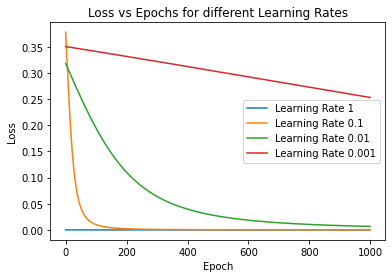

In [237]:
plt.plot(loss_list,    label="Learning Rate 1")
plt.plot(loss_list_l1, label="Learning Rate 0.1")
plt.plot(loss_list_l2, label="Learning Rate 0.01")
plt.plot(loss_list_l3, label="Learning Rate 0.001")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for different Learning Rates")
plt.legend()

# Show the plot
plt.show()